In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [16, 12]

In [41]:
DOTS = [
    {
        "val": 100,
        "x": slice(15, 36),
        "y": slice(15, 36)
    }
]

SIZE = (50, 50)
EPS = 1

In [3]:
field = np.zeros(SIZE)

for dot in DOTS:
    field[dot["y"], dot["x"]] = dot["val"]
X = np.arange(0, SIZE[0], 1)
Y = np.arange(0, SIZE[0], 1)
X, Y = np.meshgrid(X, Y)
V_sum_prev = field.sum()

In [4]:
while True:
    field[1:-1, 1:-1] = field[2:, 1:-1] / 4 + field[:-2, 1:-1] / 4 + field[1:-1, 2:] / 4 + field[1:-1, :-2] / 4
    for dot in DOTS:
        field[dot["y"], dot["x"]] = dot["val"]

    if abs(field.sum() - V_sum_prev) < EPS:
        break 
    V_sum_prev = field.sum()
    print(f"\rV_div: {abs(field.sum() - V_sum_prev)}", end="")
    

V_div: 0.0

In [5]:
E_field = np.gradient(-field)
E_field = E_field[::-1]
E_abs = np.sqrt(E_field[0] ** 2 + E_field[1] ** 2)

In [53]:
E_int = (np.sum(E_abs[DOTS[0]["y"].start-1:DOTS[0]["y"].start+1, DOTS[0]["x"].start-1:DOTS[0]["x"].stop+1]) + 
        np.sum(E_abs[DOTS[0]["y"].stop-1:DOTS[0]["y"].stop+1, DOTS[0]["x"].start-1:DOTS[0]["x"].stop+1]) + 
        np.sum(E_abs[DOTS[0]["y"].start-1:DOTS[0]["y"].stop+1, DOTS[0]["x"].start-1:DOTS[0]["x"].start+1]) + 
        np.sum(E_abs[DOTS[0]["y"].start-1:DOTS[0]["y"].stop+1, DOTS[0]["x"].stop-1:DOTS[0]["x"].stop+1]))/2


eps_0 = 8.8541e-12
q = eps_0 * E_int
C = q / DOTS[0]["val"]
C

6.097067939952486e-11

In [55]:
r1 = np.sqrt((DOTS[0]["x"].stop - DOTS[0]["x"].start - 1)*(DOTS[0]["y"].stop - DOTS[0]["y"].start - 1) / np.pi)
r2 = np.sqrt(SIZE[0]*SIZE[1] / np.pi)

C_aprox = 2 * np.pi * eps_0 / np.log(r2/r1)
C_aprox

6.071430070509472e-11

In [40]:
abs(C- C_aprox), abs(C- C_aprox) / C

(2.563786944301416e-13, 0.0042049505919092576)

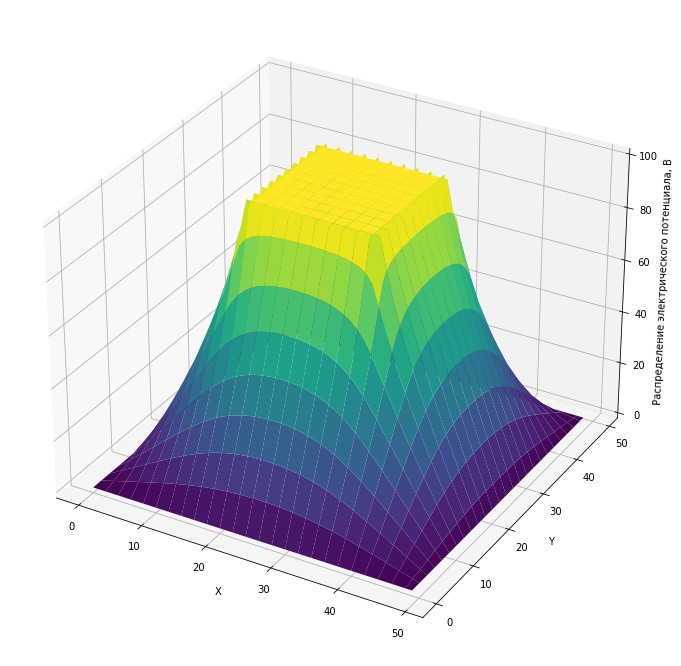

In [50]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, field, rstride=2, cstride=2,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel("Распределение электрического потенциала, В")
plt.savefig(r"C:\Users\serio\Documents\ITMO\semester 5\Wave processes in environments\homework 4\plots\field.png")


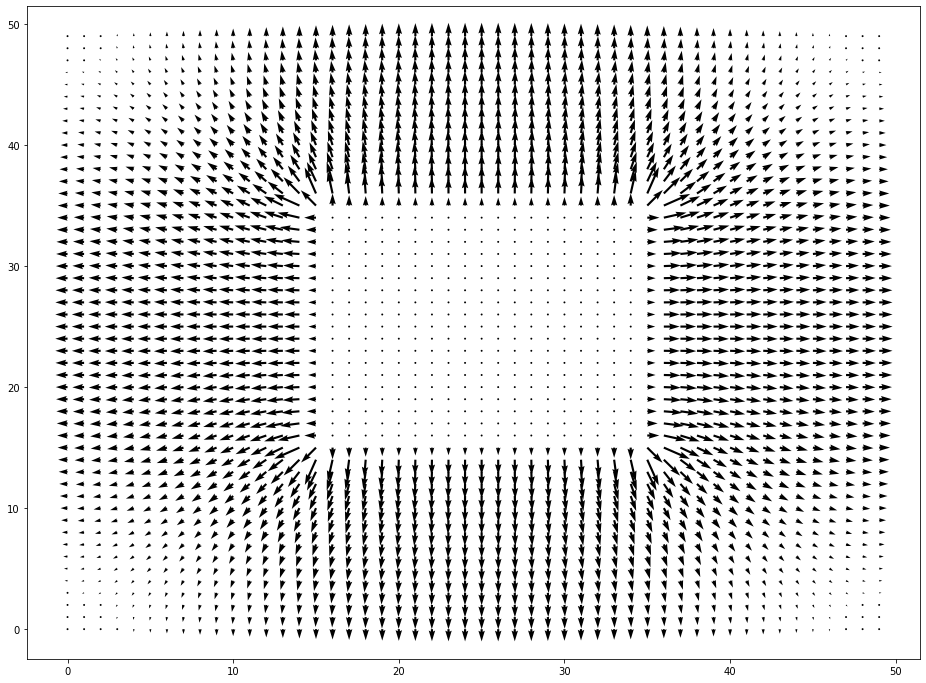

In [49]:
fig, ax = plt.subplots()
q = ax.quiver(X, Y, E_field[0], E_field[1])
plt.savefig(r"C:\Users\serio\Documents\ITMO\semester 5\Wave processes in environments\homework 4\plots\E_field.png")


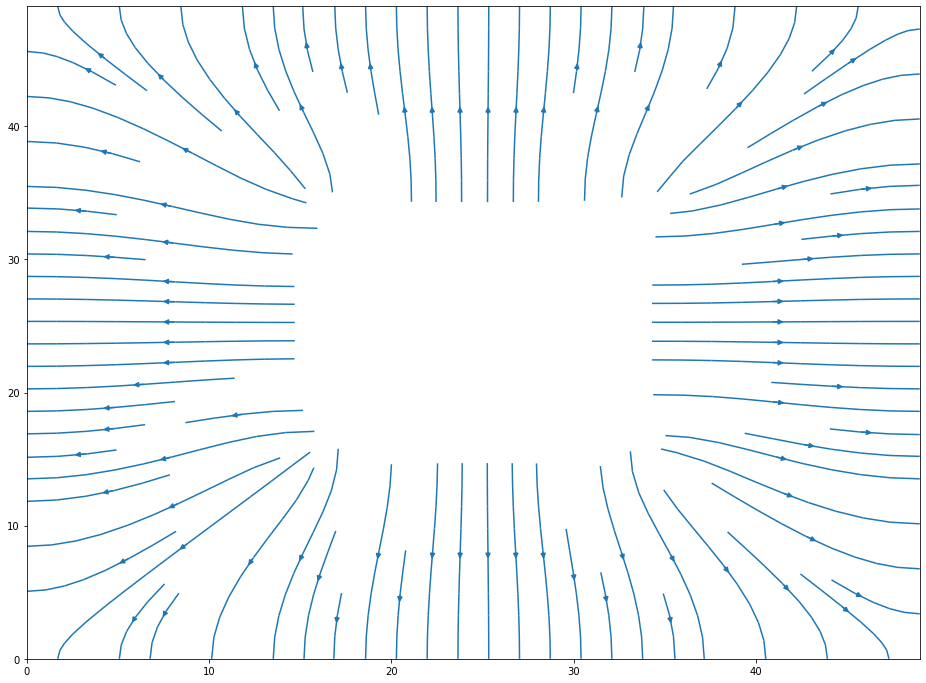

In [48]:
fig, ax = plt.subplots()
q = ax.streamplot(X, Y, E_field[0], E_field[1])
plt.savefig(r"C:\Users\serio\Documents\ITMO\semester 5\Wave processes in environments\homework 4\plots\E_lines.png")

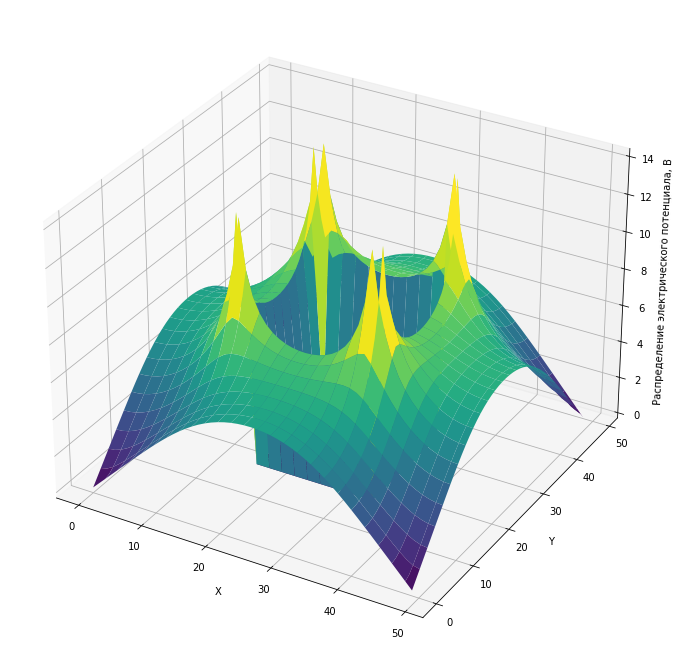

In [46]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, E_abs, rstride=2, cstride=2,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel("Распределение электрического потенциала, В")
plt.savefig(r"C:\Users\serio\Documents\ITMO\semester 5\Wave processes in environments\homework 4\plots\E_abs.png")

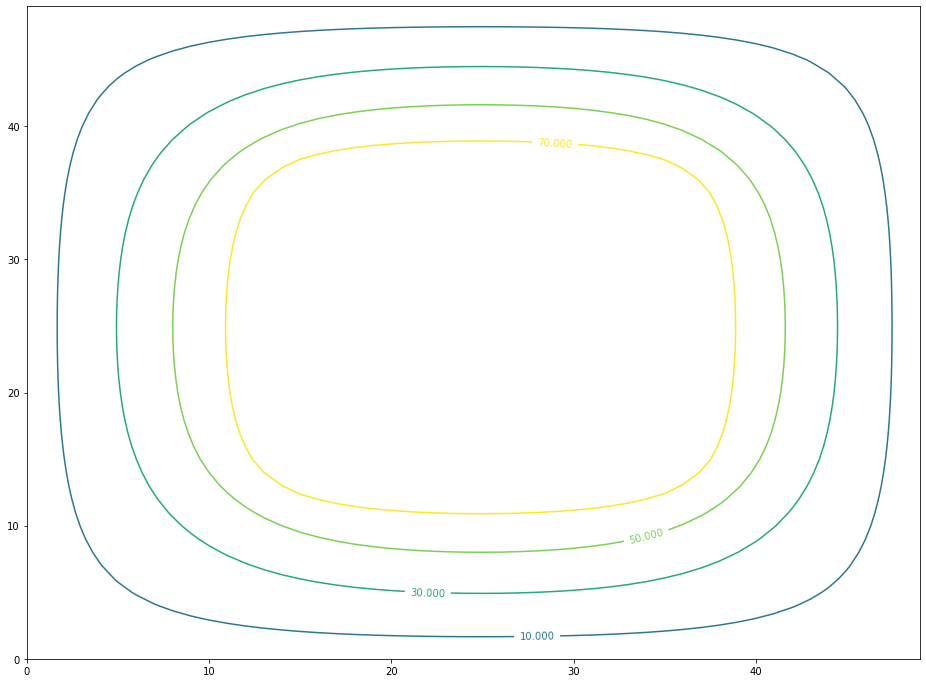

In [45]:
ax = plt.axes()
CS = ax.contour(X, Y, field, levels=[-30, -10, 10, 30, 50, 70])
ax.clabel(CS, inline=1, fontsize=10)
plt.savefig(r"C:\Users\serio\Documents\ITMO\semester 5\Wave processes in environments\homework 4\plots\ecvi.png")